In [16]:
import pymc3 as pm
import sys
sys.path.append('..')
from src.utils import *
from src.params import *
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

In [8]:
df, basin_idx, basins, coords = read_data(file_dir='../data/hierarchical_septics_v5.csv',
        cols=['ppt_2021', 'hydraulic_c', 'median_hse', 'dem'], is_balanced=True)

/Users/juannat/Documents/research/septic/bayesian_septic/notebooks/../src/utils.py:76: DtypeWarning: Columns (8,11,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_dir)


balancing...
repairs: 27.73092578545258%, non-repairs: 72.26907421454743%


# Check Empirical Distribution

Precipitation

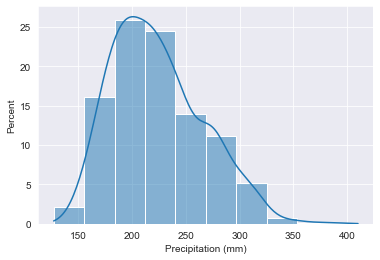

In [9]:
ax = sns.histplot(data=df, x='ppt_2021', stat="percent", bins=10, kde=True, kde_kws={'bw_adjust':3})
# ax.set_title('Distribution of Precipitation Annual Maxima in Georgia')
ax.set_xlabel('Precipitation (mm)')
plt.savefig('../docs/precip_dist.pdf', dpi=300)

Distance to water bodies

In [ ]:
ax = sns.histplot(data=df, x='water_dist', stat="percent", kde=True, kde_kws={'bw_adjust':3})
ax.set_title('Distance to Nearest Water Bodies (m) in Georgia')
ax.set_xlabel('Distance (m)')
ax.set_xlim([0,16000])
plt.savefig('../docs/wtr_dist.pdf', dpi=300)

Median Housing Values

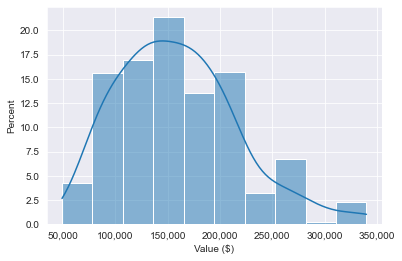

In [10]:
import matplotlib as mpl

ax = sns.histplot(data=df, x='median_hse', stat="percent", bins=10, kde=True, kde_kws={'bw_adjust':4})
# ax.set_title('Median Housing Value ($) in Georgia')
ax.set_xlabel('Value ($)')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('../docs/hse_dist.pdf', dpi=300)

Soil Hydraulics

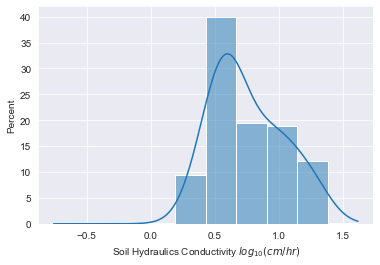

In [11]:
ax = sns.histplot(data=df, x='hydraulic_c', stat="percent", bins=10, kde=True, kde_kws={'bw_adjust':6})
# ax.set_title('Soil hydraulic conductivity in Georgia')
ax.set_xlabel('Soil Hydraulics Conductivity $log_{10}(cm/hr)$')
plt.savefig('../docs/hydr_dist.pdf', dpi=300)

DEM

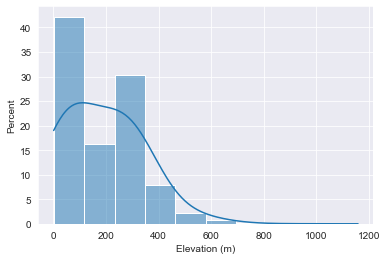

In [15]:
ax = sns.histplot(data=df, x='dem', stat="percent", bins=10, kde=True, kde_kws={'bw_adjust':8})
# ax.set_title('Digital Elevation (m) in Georgia')
ax.set_xlabel('Elevation (m)')
plt.savefig('../docs/dem_dist.pdf', dpi=300)

### Normalized Version

Precipitation

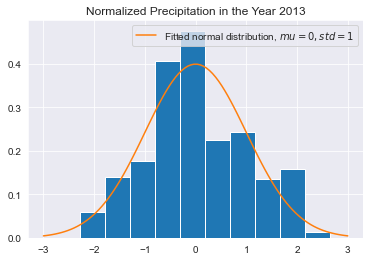

In [7]:
# plotting
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0., scale=1.)
df['ppt_2013_norm'].hist(density=True)
plt.title("Normalized Precipitation in the Year 2013")
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.legend()

Distance to water bodies

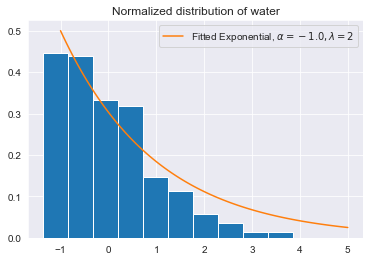

In [8]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-1,5,100)
y = stats.expon.pdf(x, loc=-1.,scale=2)
df['water_dist_norm'].hist(density=True)
plt.plot(x,y, label="Fitted Exponential, $\\alpha=-1.0, \lambda=2.$")
plt.title("Normalized distribution of water")
plt.legend()

Hydraulic Conductivity

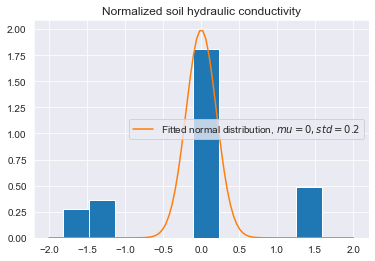

In [9]:
# plotting distribution (using Gamma distribution with alpha=1 or exponential decay)
x = np.linspace(-2,2,100)
y = stats.norm.pdf(x, loc=0., scale=0.2)
df['hydraulic_c_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=0.2$")
plt.title("Normalized soil hydraulic conductivity")
plt.legend()

Median housing values

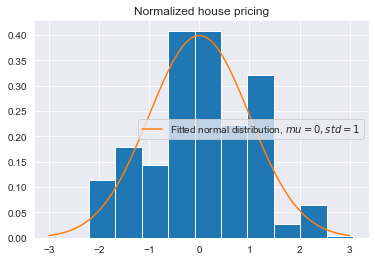

In [10]:
# plotting distribution (using Normal distribution)
x = np.linspace(-3,3,100)
y = stats.norm.pdf(x, loc=0, scale=1)
df['median_hse_norm'].hist(density=True)
plt.plot(x,y, label="Fitted normal distribution, $mu=0, std=1$")
plt.title("Normalized house pricing")
plt.legend()

DEM

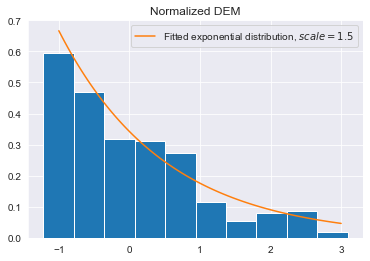

In [11]:
# plotting distribution (using Normal distribution)
x = np.linspace(-1,3,100)
y = stats.expon.pdf(x, loc=-1, scale=1.5)
df['dem_norm'].hist(density=True)
plt.plot(x,y, label="Fitted exponential distribution, $scale= 1.5$")
plt.title("Normalized DEM")
plt.legend()

# Wastewater EDA

In [3]:
df = pd.read_csv('../data/hierarchical_septics_v5.csv')

/var/folders/3_/bdv8r_590xz8hvrnflbd7dxm0000gn/T/ipykernel_11304/2214497231.py:1: DtypeWarning: Columns (8,11,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/hierarchical_septics_v5.csv')


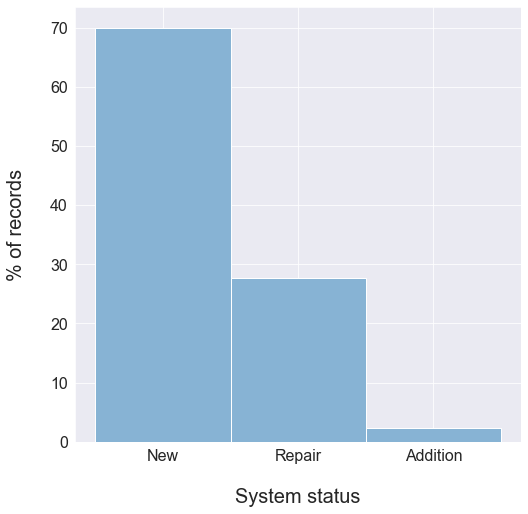

In [11]:
f, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='sewageSystem', stat="percent", facecolor='#87b3d4')
ax.set_xlabel("System status", labelpad = 24, fontsize=20)
ax.set_ylabel("% of records", labelpad = 24, fontsize=20)
ax.tick_params(labelsize=16);
f.savefig('../docs/percent_status.pdf', dpi=300, bbox_inches='tight')

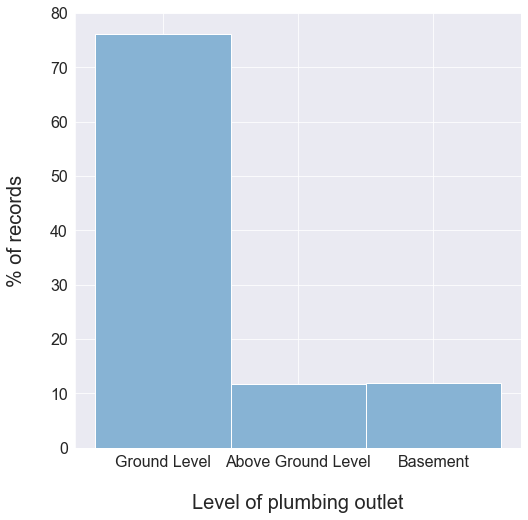

In [13]:
f, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='levelOfPlumbingOutlet', stat="percent", facecolor='#87b3d4')
ax.set_xlabel("Level of plumbing outlet", labelpad = 24, fontsize=20)
ax.set_ylabel("% of records", labelpad = 24, fontsize=20)
ax.tick_params(labelsize=16);
f.savefig('../docs/percent_plumbing.pdf', dpi=300, bbox_inches='tight')

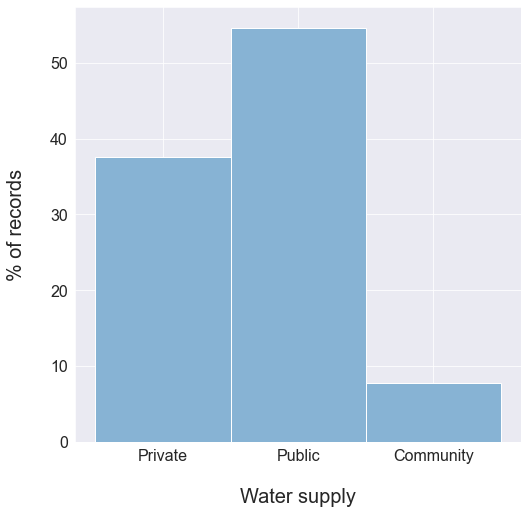

In [19]:
f, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=df[df['waterSupply'] != '3'], x='waterSupply', stat="percent", facecolor='#87b3d4')
ax.set_xlabel("Water supply", labelpad = 24, fontsize=20)
ax.set_ylabel("% of records", labelpad = 24, fontsize=20)
ax.tick_params(labelsize=16);
f.savefig('../docs/percent_watersupply.pdf', dpi=300, bbox_inches='tight')

Wastewater system distribution

/var/folders/3_/bdv8r_590xz8hvrnflbd7dxm0000gn/T/ipykernel_2238/3761850176.py:2: DtypeWarning: Columns (8,11,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/hierarchical_septics_v5.csv')


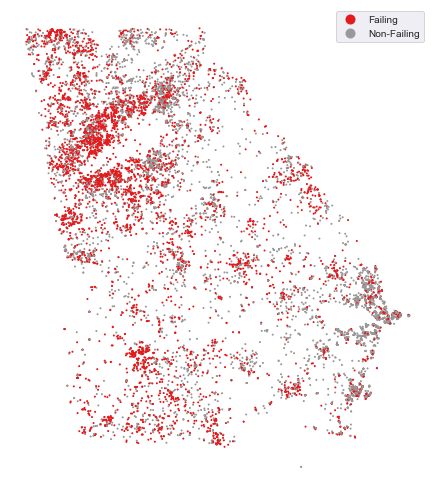

In [34]:
# Random balancing
df = pd.read_csv('../data/hierarchical_septics_v5.csv')

# encode categorical sewage system
enc, _ = pd.factorize(df['sewageSystem'])
df['sewageSystem_enc'] = enc
df.loc[df['sewageSystem_enc'] == 1, 'sewageSystem_enc'] = 'Failing' # need repair
df.loc[(df['sewageSystem_enc'] == 0) | (df['sewageSystem_enc'] == 2), 'sewageSystem_enc'] = 'Non-Failing' # new + addition

# get balanced class (septics needing repair are not as many)
num = len(df[df['sewageSystem_enc'] == 'Failing'].values)
# print(f'balancing...\nrepairs: {num/len(df)*100}%, non-repairs: {(len(df) - num)/len(df)*100}%')

# split equally
idx = df[df['sewageSystem_enc'] == 'Non-Failing']
df = pd.concat((df.sample(n=len(idx), random_state=42), df[df['sewageSystem_enc'] == 'Failing']))

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['tblSGA_Property.gis_long_property'], df['tblSGA_Property.gis_lat_property']))
gdf.set_crs('EPSG:4326', inplace=True)
f, ax = plt.subplots(figsize=(7,7))
gdf.sample(n=12000).plot(column='sewageSystem_enc', categorical=True, cmap='Set1', markersize=1, legend=True, ax=ax)
ax.axis('off')
f.tight_layout()

f.savefig('../docs/ga_system_dist.pdf', dpi=300, bbox_inches='tight')

/var/folders/3_/bdv8r_590xz8hvrnflbd7dxm0000gn/T/ipykernel_2238/584210810.py:2: DtypeWarning: Columns (8,11,13,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/hierarchical_septics_v5.csv')


balancing...
repairs: 27.73092578545258%, non-repairs: 72.26907421454743%


<bound method Figure.tight_layout of <Figure size 504x504 with 1 Axes>>

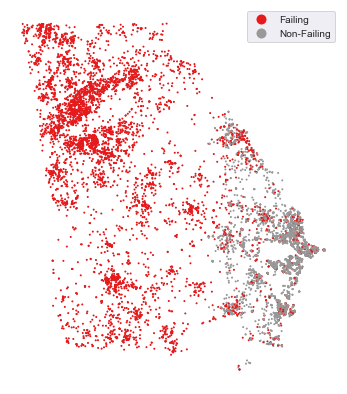

In [51]:
# Non-random balancing
df = pd.read_csv('../data/hierarchical_septics_v5.csv')

# encode categorical sewage system
enc, _ = pd.factorize(df['sewageSystem'])
df['sewageSystem_enc'] = enc
df.loc[df['sewageSystem_enc'] == 1, 'sewageSystem_enc'] = 'Failing' # need repair
df.loc[(df['sewageSystem_enc'] == 0) | (df['sewageSystem_enc'] == 2), 'sewageSystem_enc'] = 'Non-Failing' # new + addition

# get balanced class (septics needing repair are not as many)
num = len(df[df['sewageSystem_enc'] == 'Failing'].values)
print(f'balancing...\nrepairs: {num/len(df)*100}%, non-repairs: {(len(df) - num)/len(df)*100}%')

# split equally
# idx = df[df['sewageSystem_enc'] == 'Non-Failing']
df = pd.concat((df[df['sewageSystem_enc'] == 'Non-Failing'][:num], df[df['sewageSystem_enc'] == 'Failing']))

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['tblSGA_Property.gis_long_property'], df['tblSGA_Property.gis_lat_property']))
gdf.set_crs('EPSG:4326', inplace=True)
f, ax = plt.subplots(figsize=(7,7))
gdf.sample(n=12000).plot(column='sewageSystem_enc', categorical=True, cmap='Set1', markersize=1, legend=True, ax=ax)
ax.axis('off')
f.tight_layout

In [40]:
_

Index(['New', 'Repair', 'Addition'], dtype='object')